In [1]:
from strategy.baselines_traditional import macd_signals, moving_average_signals, merge_traditional_signals, simple_backtest
from strategy.baselines_ml import ml_signals_from_kline, simple_backtest as simple_backtest_ml
import pandas as pd, numpy as np
from pathlib import Path

ROOT = Path.cwd().resolve()
if ROOT.name == "research": ROOT = ROOT.parents[0]
DATA = ROOT / "DATA" / "BTCUSDT" / "15m.csv"
k = pd.read_csv(DATA)
print("Loaded:", len(k), "rows")

sig_ma   = moving_average_signals(k, fast=10, slow=30)
sig_macd = macd_signals(k)
sig_trad = merge_traditional_signals(sig_ma, sig_macd)


sig_ml = ml_signals_from_kline(k, model_name="rf", train_bars=2000, test_bars=500)

print(f"tr={len(sig_trad)}, ML={len(sig_ml)}")

Loaded: 19200 rows
tr=2265, ML=1882


In [2]:
bt_trad = simple_backtest(sig_trad, k)
bt_ml   = simple_backtest_ml(sig_ml, k)

pd.DataFrame([
    {"Strategy":"Traditional","Trades":bt_trad["trades"],
     "WinRate":f"{bt_trad['win_rate']*100:.2f}%",
     "TotalR":f"{bt_trad['ret']:.2f}", "Sharpe":f"{bt_trad['sharpe']:.2f}", "MaxDD":f"{bt_trad['mdd']:.2f}"},
    {"Strategy":"ML (RF)","Trades":bt_ml["trades"],
     "WinRate":f"{bt_ml['win_rate']*100:.2f}%",
     "TotalR":f"{bt_ml['ret']:.2f}", "Sharpe":f"{bt_ml['sharpe']:.2f}", "MaxDD":f"{bt_ml['mdd']:.2f}"},
])


Strategy  Trades WinRate TotalR Sharpe  MaxDD
0  Traditional    1563  27.77%  -0.85  -7.03  -0.85
1      ML (RF)     241  52.70%  -0.32  -1.76  -0.37

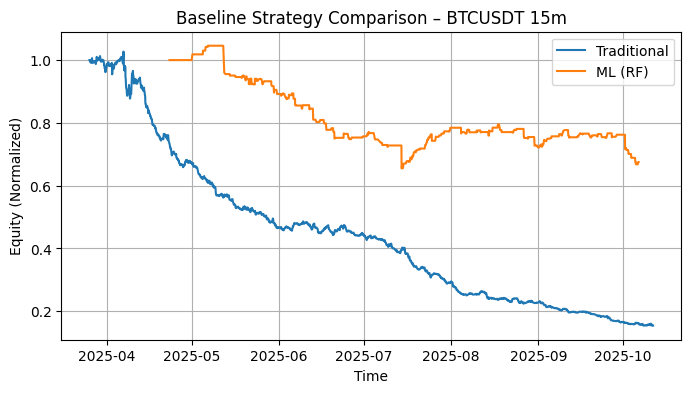

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(bt_trad["curve"]["ts"], bt_trad["curve"]["equity"], label="Traditional")
plt.plot(bt_ml["curve"]["ts"], bt_ml["curve"]["equity"], label="ML (RF)")
plt.title("Baseline Strategy Comparison – BTCUSDT 15m")
plt.xlabel("Time"); plt.ylabel("Equity (Normalized)")
plt.legend(); plt.grid(True)
plt.show()
